# Problema

Implementación de la regresión lineal

## Instrucciones

Generar una implementación correcta de la regresión lineal usando el descenso del gradiente como método de optimización de los pesos y compararlo con la implementación directa de la librería sklearn (los valores de w y b no serán exactamente iguales pero muy similares)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error


In [2]:
# Generación del dataset
np.random.seed(0)  # Para reproducibilidad
X = np.random.uniform(1, 10, 5000)  # Generar 5000 valores aleatorios para las horas de estudio
error = np.random.normal(0, 5, 5000)  # Generar errores aleatorios
y = 50 + 5 * X + error  # Generar la puntuación del examen

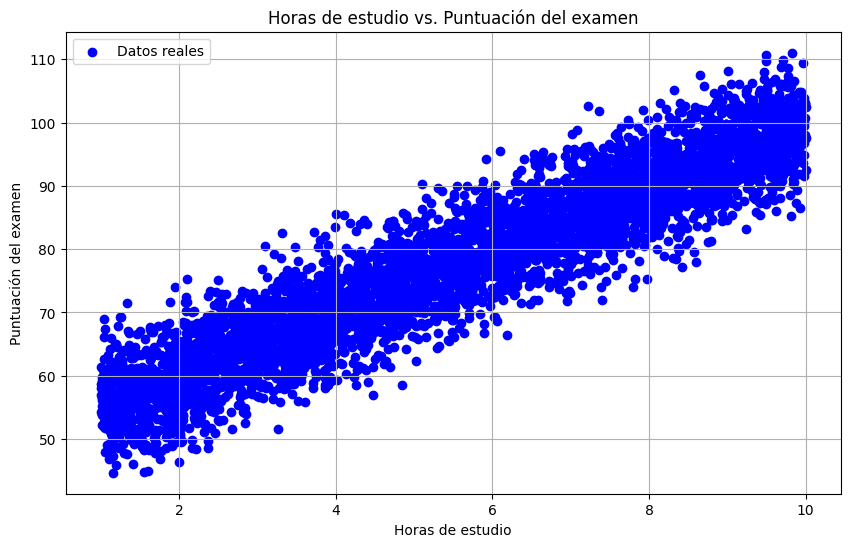

In [3]:
# Visualización de los datos
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Dividir los datos en conjuntos de entrenamiento, validación y prueba
# 80 % TRAIN Y VAL 20 % TEST

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0)  # 0.25 x 0.8 = 0

print('Datos de Entrenamiento:', X_train.shape[0])
print('Datos de Validación:', X_val.shape[0])
print('Datos de Test:', X_test.shape[0])


Datos de Entrenamiento: 3000
Datos de Validación: 1000
Datos de Test: 1000


## Implementación manual de la regresión con gradiente descendente

In [5]:
import numpy as np

# Función de costo (Mean Squared Error)
def cost_function(y_true, y_pred):
    """
    Calcula el costo usando Mean Squared Error (MSE)
    """
    n = len(y_true)
    cost = (1 / n) * np.sum((y_true - y_pred) ** 2)
    return cost


# Gradiente descendente para ajustar los parámetros del modelo
def train_regression(X_train, y_train, X_val, y_val, lr=0.01, epochs=1000):
    """
    Entrena un modelo de regresión lineal usando gradiente descendente.
    """
    # Inicializar los coeficientes (pesos) w y b en cero
    w = 0
    b = 0

    # Listas para almacenar el costo en cada epoch
    train_loss_per_epoch = []
    val_loss_per_epoch = []

    # Número de muestras
    n_train = len(y_train)
    n_val = len(y_val)

    # Bucle principal para el entrenamiento
    for epoch in range(epochs):
        # ---------------------- ENTRENAMIENTO ----------------------
        # Calcular las predicciones para el conjunto de entrenamiento
        y_pred_train = np.dot(X_train, w) + b

        # Calcular el costo de entrenamiento
        train_loss = cost_function(y_train, y_pred_train)
        train_loss_per_epoch.append(train_loss)

        # Calcular los gradientes para w y b
        dw = (-2 / n_train) * np.dot(X_train.T, (y_train - y_pred_train))  # Gradiente respecto a w
        db = (-2 / n_train) * np.sum(y_train - y_pred_train)               # Gradiente respecto a b

        # Actualizar los pesos usando el learning rate
        w -= lr * dw
        b -= lr * db

        # ---------------------- VALIDACIÓN ----------------------
        # Calcular las predicciones para el conjunto de validación
        y_pred_val = np.dot(X_val, w) + b

        # Calcular el costo de validación
        val_loss = cost_function(y_val, y_pred_val)
        val_loss_per_epoch.append(val_loss)

    return w, b, train_loss_per_epoch, val_loss_per_epoch


In [6]:
# Hiperparámetros
lr = 1e-2
epochs = 1000

# Entrenar el modelo
w, b, train_loss_per_epoch, val_loss_per_epoch = train_regression(X_train, y_train, X_val, y_val, lr=lr, epochs=epochs)

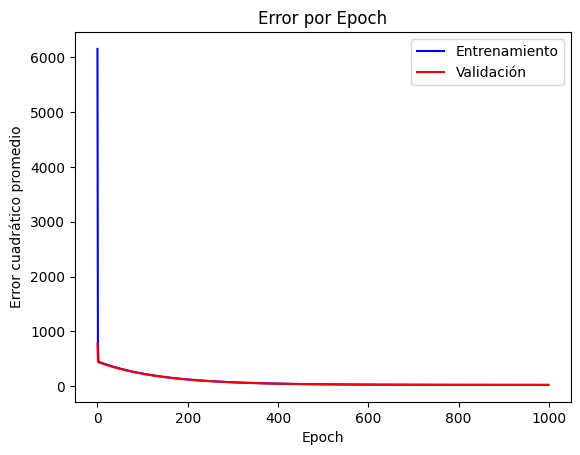

In [7]:
# Visualización del error de entrenamiento por epoch
plt.figure()
plt.plot(range(epochs), train_loss_per_epoch, '-b')
plt.plot(range(epochs), val_loss_per_epoch, '-r')
plt.xlabel('Epoch')
plt.ylabel('Error cuadrático promedio')
plt.title('Error por Epoch')
plt.legend(['Entrenamiento', 'Validación'])
plt.show()

Costo del modelo: 23.924864045252935


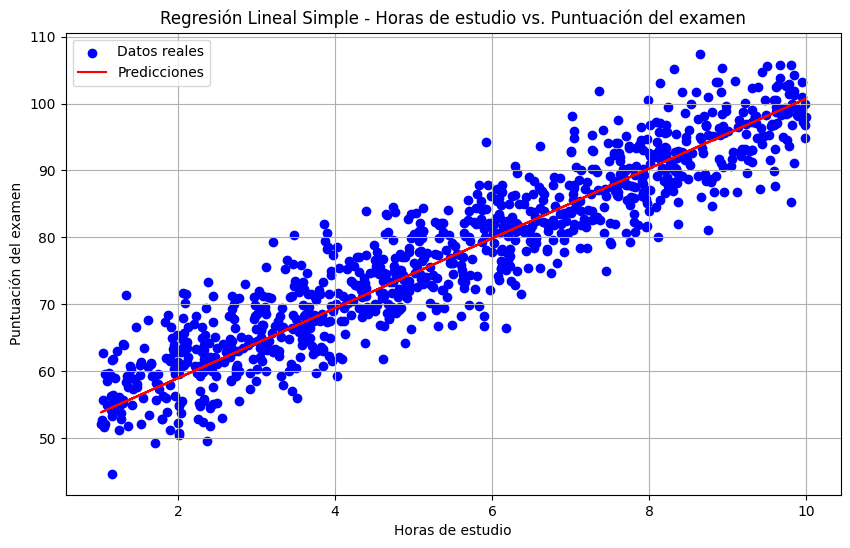

In [8]:
# Realizar predicciones en test
y_pred = w * X_test.flatten() + b

# Calcular el costo
cost = cost_function(y_test, y_pred)

print("Costo del modelo:", cost)

# Visualización del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
# Calcular las métricas de evaluación mse, mae, r2 y mape
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("MSE en el conjunto de test:", mse)
print("MAE en el conjunto de test:", mae)
print("R^2 en el conjunto de test:", r2)
print("MAPE en el conjunto de test:", mape)

MSE en el conjunto de test: 23.924864045252935
MAE en el conjunto de test: 3.834023794923346
R^2 en el conjunto de test: 0.8651819894123756
MAPE en el conjunto de test: 0.051064495801539704


## Implementación de la regresión lineal usando sklearn

In [10]:
# Crear el modelo de regresión lineal con sklearn
lr_model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
lr_model.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

Costo del modelo: 23.3487965486719


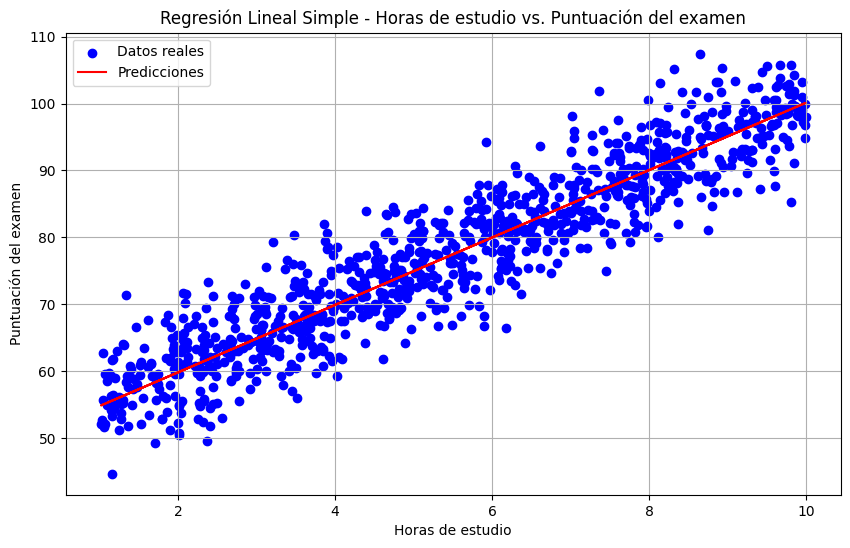

In [11]:
# Realizar predicciones en test
y_pred = lr_model.predict(X_test.reshape(-1, 1))

# Calcular el costo
cost = cost_function(y_test, y_pred)

print("Costo del modelo:", cost)

# Visualización del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# Calcular las métricas de evaluación mse, mae, r2 y mape
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("MSE en el conjunto de entrenamiento:", mse)
print("MAE en el conjunto de entrenamiento:", mae)
print("R^2 en el conjunto de entrenamiento:", r2)
print("MAPE en el conjunto de entrenamiento:", mape)

MSE en el conjunto de entrenamiento: 23.3487965486719
MAE en el conjunto de entrenamiento: 3.7925246603340486
R^2 en el conjunto de entrenamiento: 0.8684281635058354
MAPE en el conjunto de entrenamiento: 0.050656770937904314


## Comparación de parámetros obtenidos

In [14]:
b_sklearn = lr_model.intercept_
w_sklearn = lr_model.coef_[0]

print("Coeficiente de intercepción (b) - Manual:", b)
print("Coeficiente de pendiente (w) - Manual:", w)
print("Coeficiente de intercepción (b) - Scikit-learn:", b_sklearn)
print("Coeficiente de pendiente (w) - Scikit-learn:", w_sklearn)

Coeficiente de intercepción (b) - Manual: 48.550172451246475
Coeficiente de pendiente (w) - Manual: 5.218680979676651
Coeficiente de intercepción (b) - Scikit-learn: 49.773481054465435
Coeficiente de pendiente (w) - Scikit-learn: 5.035022581536044
